In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
#Load the Dataset
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
#Explore the Data
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#Clean the Data and Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.drop('Cabin', axis=1, inplace=True)
df["Embarked"] = (SimpleImputer(strategy="most_frequent").fit_transform(df[["Embarked"]]).ravel())

In [5]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [6]:
# Encode Categorical Variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [7]:
# Feature Selection
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [8]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [11]:
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8101


In [12]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



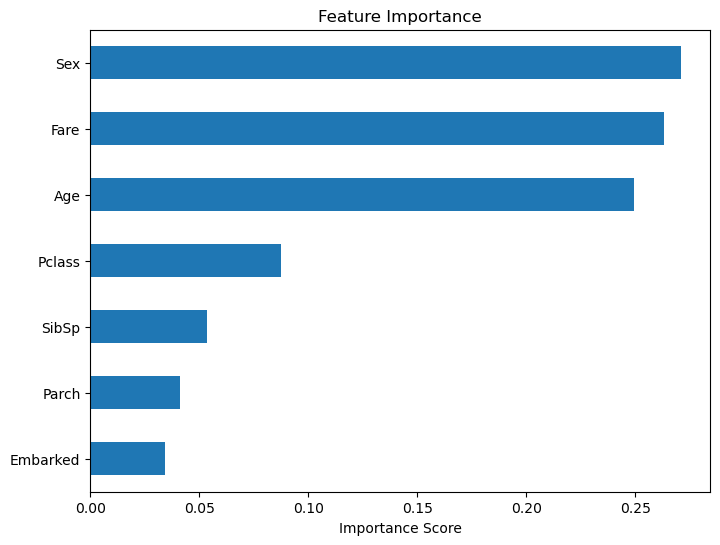

In [13]:
#Feature Importance
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=features)
feature_importance.sort_values().plot(kind='barh', figsize=(8,6), title="Feature Importance")
plt.xlabel("Importance Score")
plt.show()

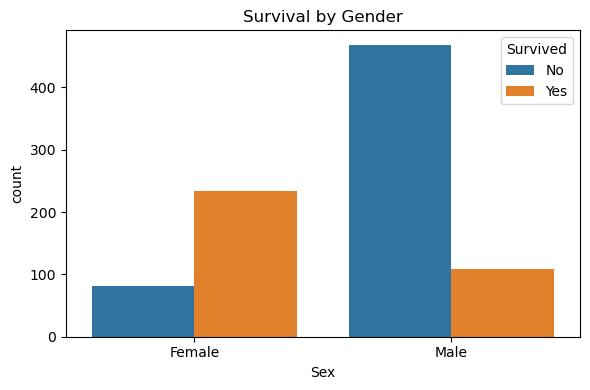

In [18]:
# Distribution by Gender
plt.figure(figsize=(6, 4))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

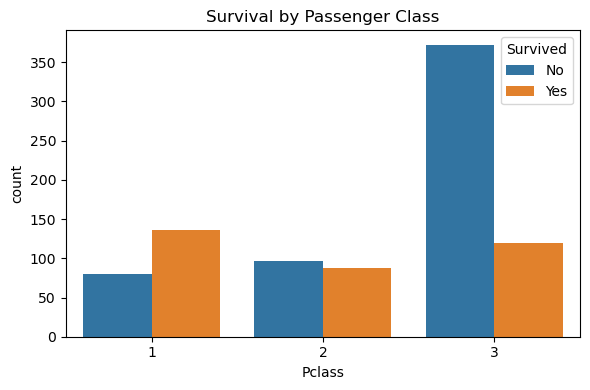

In [19]:
#Distribution by Class
plt.figure(figsize=(6, 4))
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

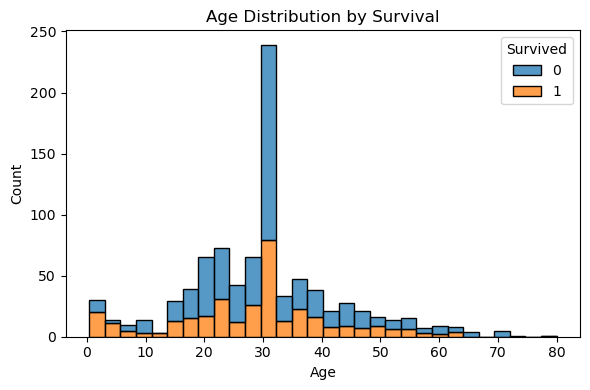

In [20]:
# Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", bins=30)
plt.title("Age Distribution by Survival")
plt.tight_layout()
plt.show()

In [21]:
# Save the Model
import joblib
joblib.dump(model, 'titanic_rf_model.pkl')
model = joblib.load('titanic_rf_model.pkl')